<H1> Análise Exploratória </H1>
Objetivo: Um notebook contendo a análise exploratória dos dados que subsidiou o desenvolvimento do modelo preditivo;

    -> análise estatística descritiva sobre a amostra disponibilizada;
    -> exploração analítica por meio de bibliotecas de visualização;
    -> passos que guiaram a seleção dos melhores atributos para o modelo; e
    -> passos que subsidiaram possíveis transformações que se fizeram necessárias nos dados de entrada.

In [1]:
# Basico
import numpy as np 
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# Outras bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# IA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

<H2>Carga dos Dados</H2>

In [2]:
#CARGA DOS DADOS
data = pd.read_csv(
    "heart-train.csv",      # relative python path to subdirectory        
    na_values=['?']       # Take any '.' or '??' values as NA
)

<H2> Análise Estatística</H2>

As colunas nestes conjuntos de dados são:
As colunas nestes conjuntos de dados são:

<ul>
<li>Paciente: identificação única do paciente no conjunto de dados </li>
<li>Hospital: identificação do hospital em que a pessoa foi atendida</li>
<li>Idade: idade (em anos)</li>
<li>Sexo: sexo (F: feminino, M: masculino)</li>
<li>TDP: tipo de dor no peito (1: angina típica, 2: angina atípica, 3: dor não anginal, 4: assintomática)</li>
<li>PAR: pressão arterial em repouso ao chegar no hospital (em mmHg)</li>
<li>CS: colesterol sérico (em mg/dL)</li>
<li>ASJ: açúcar no sangue em jejum > 120 mg/dL (0: não, 1: sim)</li>
<li>ECG: resultados eletrocardiográficos em repouso (0: normal, 1: anormalidade da onda ST-T, 2: hipertrofia ventricular esquerda)</li>
<li>FCM: frequência cardíaca máxima alcançada</li>
<li>AIE: angina induzida por exercício (0: não, 1: sim)</li>
<li>DST: depressão do segmento ST induzida por exercício em relação ao repouso</li>
<li>IST: inclinação do segmento ST do pico do exercício (1: subida, 2: plana, 3: descida)</li>
<li>NVP: número de vasos principais (0 a 3) coloridos por fluoroscopia</li>
<li>Talassemia: talassemia (3: normal, 6: defeito consertado, 7: defeito reversível)</li>
<li>Diagnóstico: diagnóstico de doença cardíaca / status da doença angiográfica (A: ausência, P: presença)</li>
</ul>

In [3]:
data.describe()

,Paciente,Idade,TDP,PAR,CS,ASJ,ECG,FCM,AIE,DST,IST,NVP,Talassemia
count,613.000000,613.000000,613.000000,571.000000,593.000000,553.000000,611.000000,574.000000,574.000000,569.000000,398.000000,207.000000,293.000000
mean,460.464927,53.722675,3.269168,132.360771,199.779089,0.177215,0.608838,136.454704,0.388502,0.870650,1.753769,0.719807,5.163823
std,266.347335,9.472945,0.902599,18.023750,112.727563,0.382196,0.809282,26.347732,0.487835,1.098927,0.606159,0.989628,1.917955
min,2.000000,28.000000,1.000000,80.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000
25%,234.000000,47.000000,3.000000,120.000000,173.000000,0.000000,0.000000,119.250000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,469.000000,54.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.500000,2.000000,0.000000,6.000000
75%,691.000000,60.000000,4.000000,142.000000,267.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000
max,919.000000,77.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [4]:
data

,Paciente,Hospital,Idade,Sexo,TDP,PAR,CS,ASJ,ECG,FCM,AIE,DST,IST,NVP,Talassemia,Diagnóstico
0,262,C,60,F,1,150.0,240.0,0.0,0.0,171.0,0.0,0.9,1.0,0.0,3.0,A
1,520,H,54,M,4,125.0,224.0,0.0,0.0,122.0,0.0,2.0,2.0,NaN,NaN,P
2,264,C,61,M,4,138.0,166.0,0.0,2.0,125.0,1.0,3.6,2.0,1.0,3.0,P
3,674,S,60,M,3,115.0,0.0,NaN,0.0,143.0,0.0,2.4,1.0,NaN,NaN,P
4,102,C,57,F,4,128.0,303.0,0.0,2.0,159.0,0.0,0.0,1.0,1.0,3.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,714,S,69,M,4,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,7.0,P
609,103,C,71,F,3,110.0,265.0,1.0,2.0,130.0,0.0,0.0,1.0,1.0,3.0,A
610,854,V,55,M,4,172.0,260.0,0.0,0.0,73.0,0.0,2.0,NaN,NaN,NaN,P
611,619,S,47,M,4,110.0,0.0,NaN,1.0,149.0,0.0,2.1,1.0,NaN,NaN,P


In [5]:
data.dtypes

Paciente         int64
Hospital        object
Idade            int64
Sexo            object
TDP              int64
PAR            float64
CS             float64
ASJ            float64
ECG            float64
FCM            float64
AIE            float64
DST            float64
IST            float64
NVP            float64
Talassemia     float64
Diagnóstico     object
dtype: object

<h2> Conversão dos dados, os dados categóricos tem de ser convertidos em int ou float. </h2>


In [6]:
data['Hospital'] = data.Hospital.str.replace('C', '1')
data['Hospital'] = data.Hospital.str.replace('H', '2')
data['Hospital'] = data.Hospital.str.replace('S', '3')
data['Hospital'] = data.Hospital.str.replace('V', '4')
data['Hospital'] = data.Hospital.astype(int)

data['Sexo'] = data.Sexo.str.replace('F', '1')
data['Sexo'] = data.Sexo.str.replace('M', '2')
data['Sexo'] = data.Sexo.astype(int)

data['Diagnóstico'] = data.Diagnóstico.str.replace('A', '0')
data['Diagnóstico'] = data.Diagnóstico.str.replace('P', '1')
data['Diagnóstico'] = data.Diagnóstico.astype(int)


In [7]:
data.describe()

,Paciente,Hospital,Idade,Sexo,TDP,PAR,CS,ASJ,ECG,FCM,AIE,DST,IST,NVP,Talassemia,Diagnóstico
count,613.000000,613.000000,613.000000,613.000000,613.000000,571.000000,593.000000,553.000000,611.000000,574.000000,574.000000,569.000000,398.000000,207.000000,293.000000,613.000000
mean,460.464927,2.233279,53.722675,1.797716,3.269168,132.360771,199.779089,0.177215,0.608838,136.454704,0.388502,0.870650,1.753769,0.719807,5.163823,0.570962
std,266.347335,1.119962,9.472945,0.402031,0.902599,18.023750,112.727563,0.382196,0.809282,26.347732,0.487835,1.098927,0.606159,0.989628,1.917955,0.495343
min,2.000000,1.000000,28.000000,1.000000,1.000000,80.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,234.000000,1.000000,47.000000,2.000000,3.000000,120.000000,173.000000,0.000000,0.000000,119.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,469.000000,2.000000,54.000000,2.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,691.000000,3.000000,60.000000,2.000000,4.000000,142.000000,267.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,1.000000
max,919.000000,4.000000,77.000000,2.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


count: quanto maior esse número, maior credibilidade todas as estatísticas terão.

mean: é a média e é o valor "esperado" da distribuição. Em média, você esperaria obter esse número.

std: informa o tamanho das oscilações dos dados em relação à média. Especificamente, é o desvio médio quadrático da média ou variância.
Quanto menor é a variância, mais próximos os valores estão da média; mas quanto maior ela é, mais os valores estão distantes da média.


50% também é a mediana e sua diferença em relação à média fornece informações sobre a inclinação da distribuição. Também é outra definição de média que é robusta para discrepantes nos dados.

25% e 75% dão perspectiva sobre a curtose. Além disso, todos os números percentuais são geralmente mais robustos para os valores discrepantes.

min, max, max - min, 75% - 25% são alternativas para perspectivas de quão grande é a variação dos dados em relação à média

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f307b54fd50>,
      dtype=object)

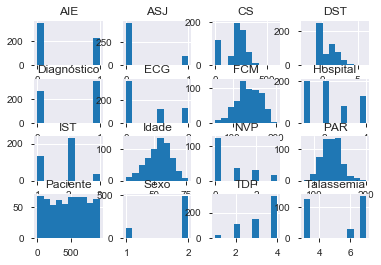

In [8]:
data.hist()

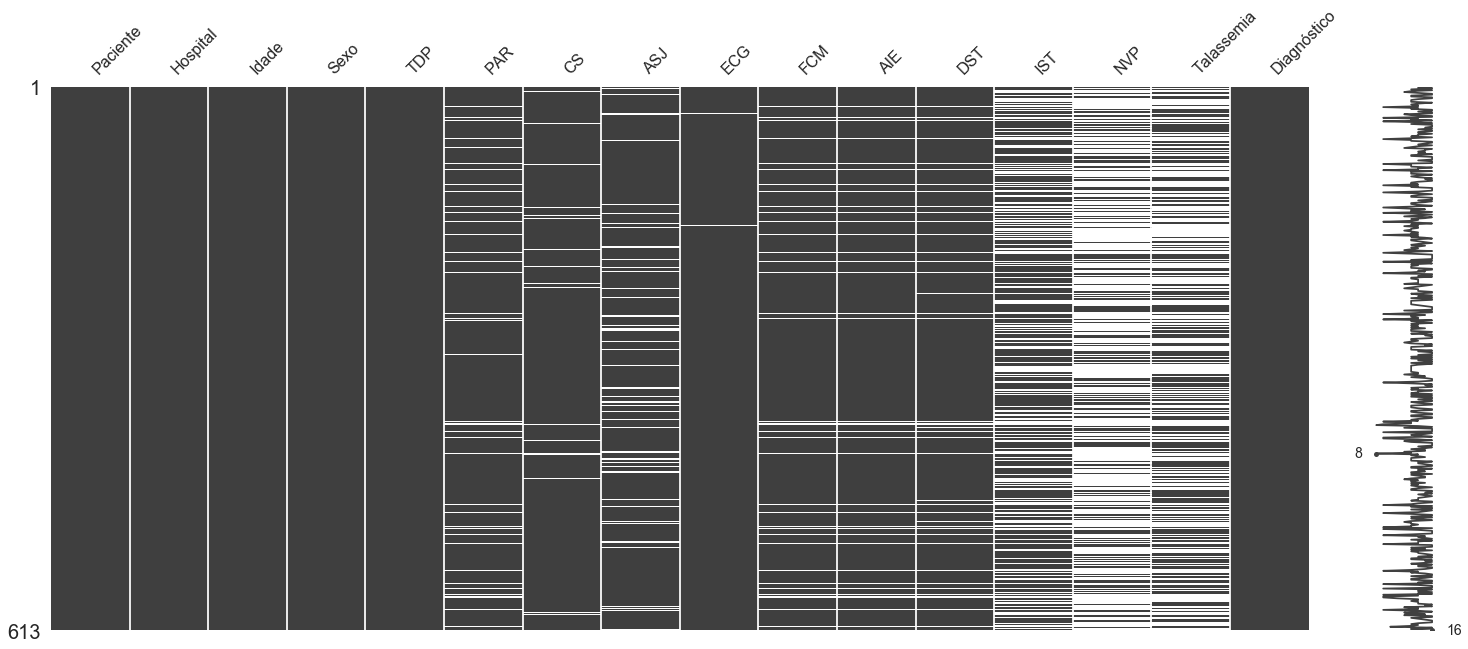

In [9]:
msno.matrix(data)

In [10]:
data.isnull().sum()

Paciente         0
Hospital         0
Idade            0
Sexo             0
TDP              0
PAR             42
CS              20
ASJ             60
ECG              2
FCM             39
AIE             39
DST             44
IST            215
NVP            406
Talassemia     320
Diagnóstico      0
dtype: int64

Text(0.5, 0, 'Diagnóstico')

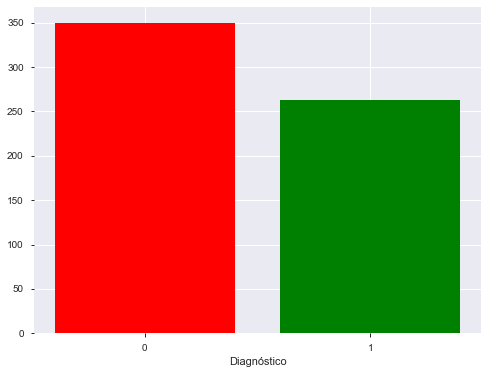

In [11]:
#Diagnóstico, demonstrando se um o resultado está equilibrado quando ao diagnóstico
rcParams['figure.figsize'] = 8,6
plt.bar(data['Diagnóstico'].unique(), data['Diagnóstico'].value_counts(), color = ['red', 'green'])
plt.xticks([0,1])
plt.xlabel('Diagnóstico')

In [12]:
data.profile_report(style={'full_width':True})

In [13]:
#dummies 
data = pd.get_dummies(data, columns = ['Sexo'])

from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy="most_frequent")
data.dtypes
data = data.fillna(data.agg(lambda x: pd.Series.mode(x)[0], axis=0))




In [14]:
# TODO
# TDP
# PAR
# CS
# ASJ
# ECG
# FCM
# AIE -> mais comum - média
# DST
# IST -> retirar
# NVP -> retirar

In [15]:
#escalar
# standardScaler = StandardScaler() #MinMaxScaler()
# columns_to_scale = ['TDP', 'PAR','CS', 'ASJ', 'ECG', 'FCM', 'AIE', 'DST', 'IST', 'NVP']
# data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

In [16]:
data

,Paciente,Hospital,Idade,TDP,PAR,CS,ASJ,ECG,FCM,AIE,DST,IST,NVP,Talassemia,Diagnóstico,Sexo_1,Sexo_2
0,262,1,60,1,150.0,240.0,0.0,0.0,171.0,0.0,0.9,1.0,0.0,3.0,0,1,0
1,520,2,54,4,125.0,224.0,0.0,0.0,122.0,0.0,2.0,2.0,0.0,7.0,1,0,1
2,264,1,61,4,138.0,166.0,0.0,2.0,125.0,1.0,3.6,2.0,1.0,3.0,1,0,1
3,674,3,60,3,115.0,0.0,0.0,0.0,143.0,0.0,2.4,1.0,0.0,7.0,1,0,1
4,102,1,57,4,128.0,303.0,0.0,2.0,159.0,0.0,0.0,1.0,1.0,3.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,714,3,69,4,120.0,0.0,0.0,1.0,120.0,0.0,0.0,2.0,0.0,7.0,1,0,1
609,103,1,71,3,110.0,265.0,1.0,2.0,130.0,0.0,0.0,1.0,1.0,3.0,0,1,0
610,854,4,55,4,172.0,260.0,0.0,0.0,73.0,0.0,2.0,2.0,0.0,7.0,1,0,1
611,619,3,47,4,110.0,0.0,0.0,1.0,149.0,0.0,2.1,1.0,0.0,7.0,1,0,1
